In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import  accuracy_score,f1_score, roc_auc_score,roc_curve, auc, mean_absolute_error, mean_squared_error, r2_score


In [3]:
data = pd.read_csv('gym_members_exercise_tracking.csv')

In [3]:
data

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [4]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [8]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [4]:
label = LabelEncoder()
data['Gender'] = label.fit_transform(data['Gender'])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    int32  
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

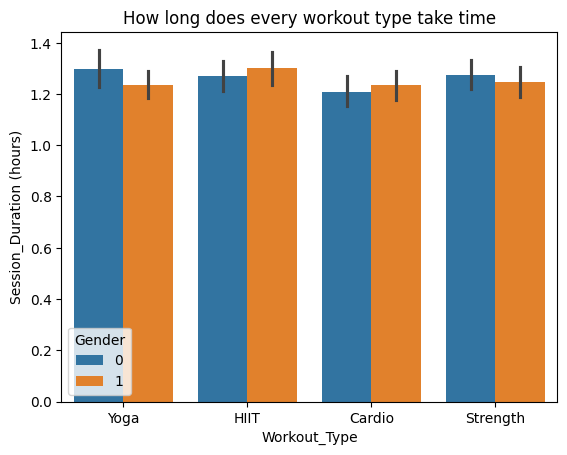

In [6]:
sns.barplot(x='Workout_Type', y='Session_Duration (hours)', data=data, hue='Gender')
plt.title('How long does every workout type take time')
plt.show()

C:\Users\Kuldip\AppData\Local\Temp\ipykernel_24148\1102612728.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Experience_Level', data=data, palette='pastel')


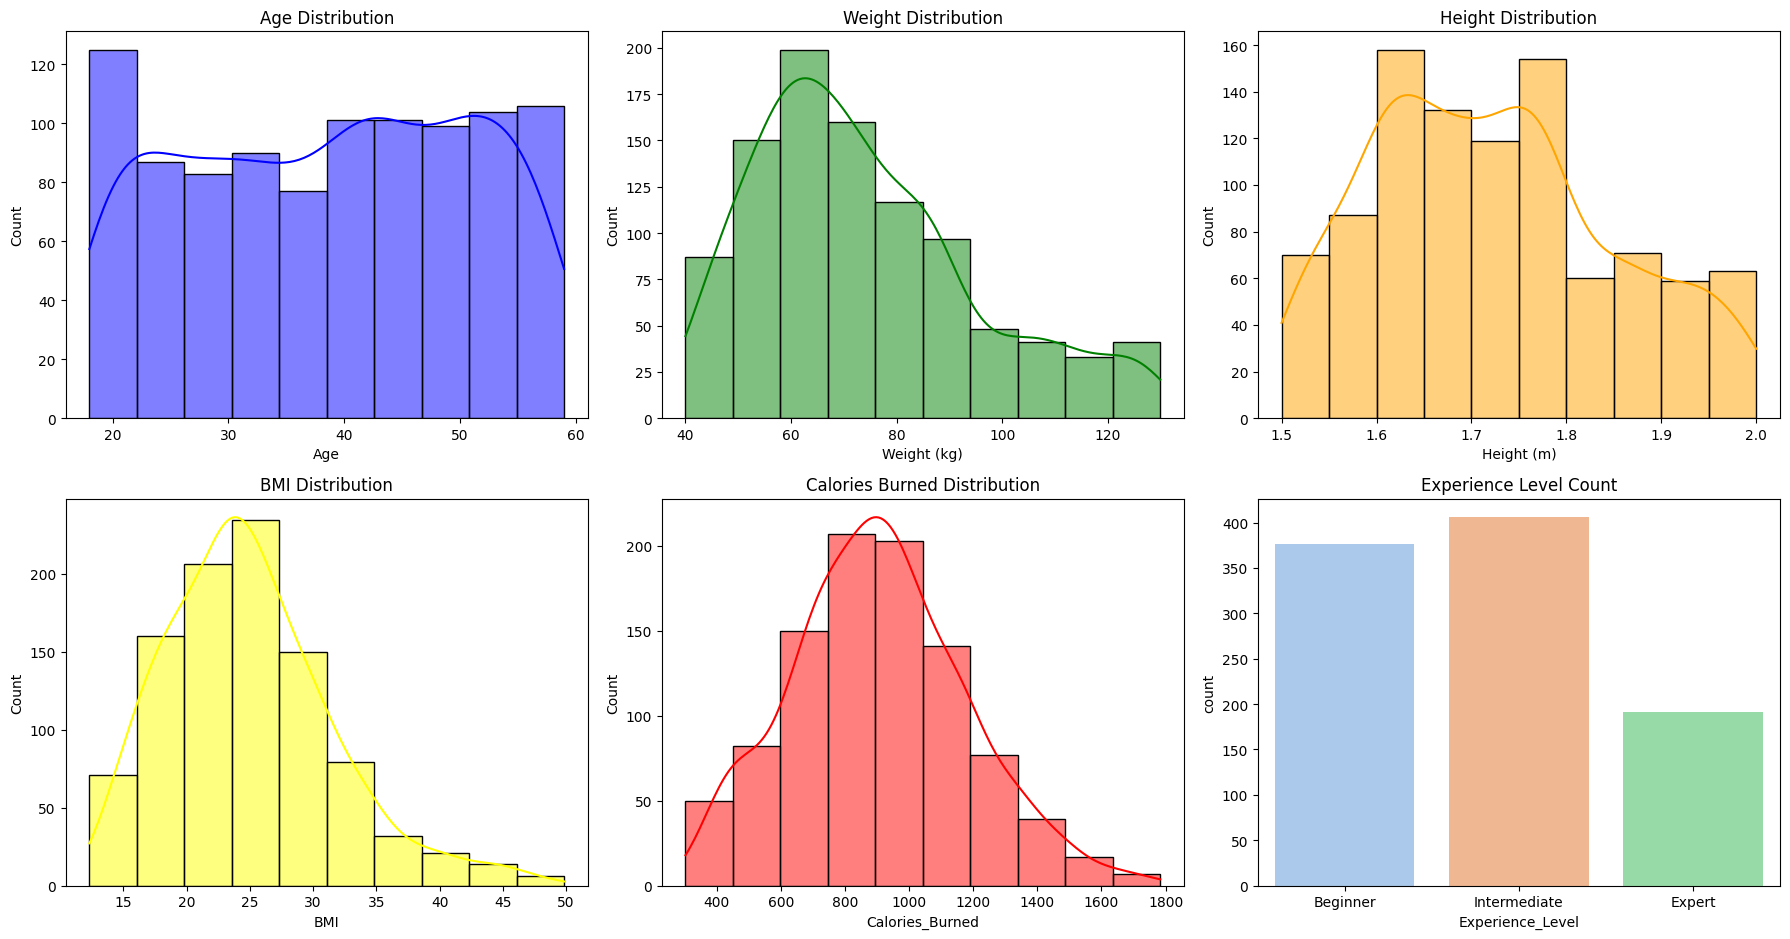

In [ ]:
# plt.figure(figsize=(18, 10))

# plt.subplot(2, 3, 1)
# sns.histplot(data['Age'], bins=10, kde=True, color='blue')
# plt.title("Age Distribution")

# plt.subplot(2, 3, 5)
# sns.histplot(data['Calories_Burned'], bins=10, kde=True, color='red')
# plt.title("Calories Burned Distribution")

# plt.subplot(2, 3, 2)
# sns.histplot(data['Weight (kg)'], bins=10, kde=True, color='green')
# plt.title("Weight Distribution")

# plt.subplot(2, 3, 4)
# sns.histplot(data['BMI'], bins=10, kde=True, color='yellow')
# plt.title("BMI Distribution")

# plt.subplot(2, 3, 3)
# sns.histplot(data['Height (m)'], bins=10, kde=True, color='orange')
# plt.title("Height Distribution")

# plt.subplot(2, 3, 6)
# experience_labels = ['Beginner', 'Intermediate', 'Expert']
# sns.countplot(x='Experience_Level', data=data, palette='pastel')
# plt.xticks(ticks=[0, 1, 2], labels=experience_labels)
# plt.title("Experience Level Count")

# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()

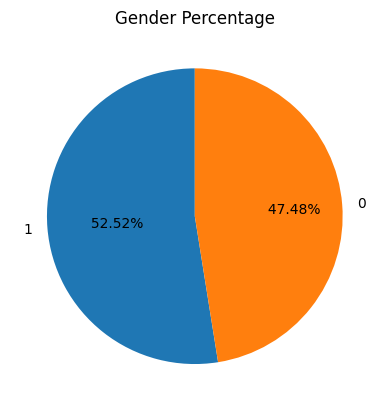

In [7]:
gender_counts = data['Gender'].value_counts()
gender_percentage = gender_counts / gender_counts.sum() * 100

plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%10.2f%%', startangle=90)
plt.title("Gender Percentage")
plt.show()

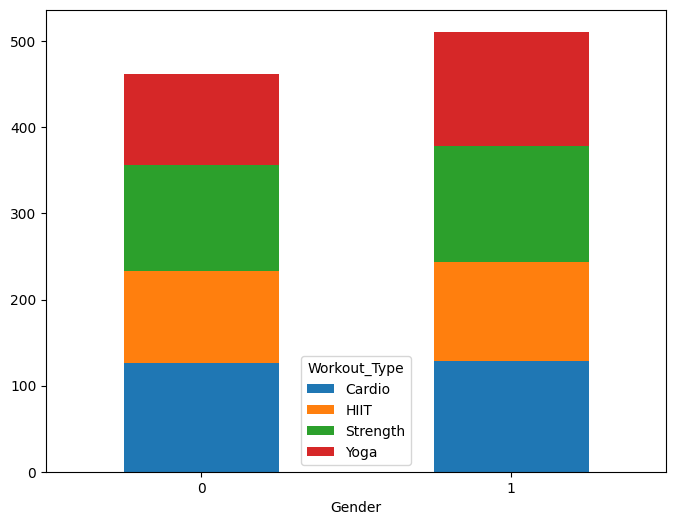

In [8]:
# workout type by gender

data.groupby(['Gender','Workout_Type']).size().unstack().plot(kind='bar',stacked=True,figsize=(8,6))
plt.xticks(rotation="horizontal")
plt.show()

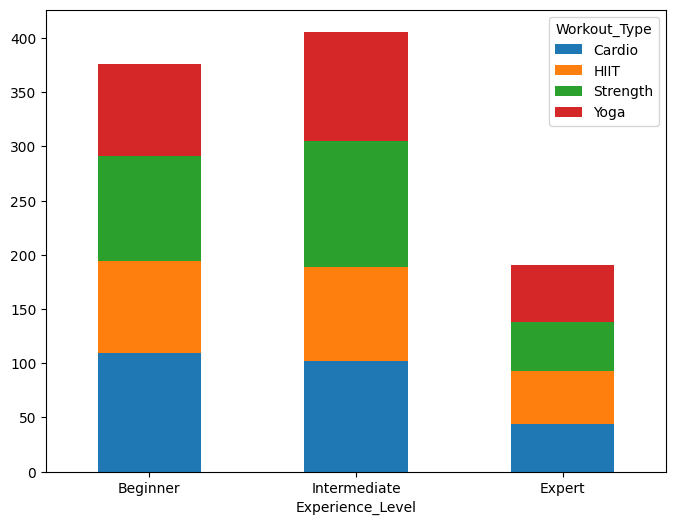

In [13]:
# experience_lavel with workout type

data.groupby(['Experience_Level','Workout_Type']).size().unstack().plot(kind='bar',stacked=True,figsize=(8,6))
labels = ['Beginner', 'Intermediate', 'Expert']
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)
plt.show()

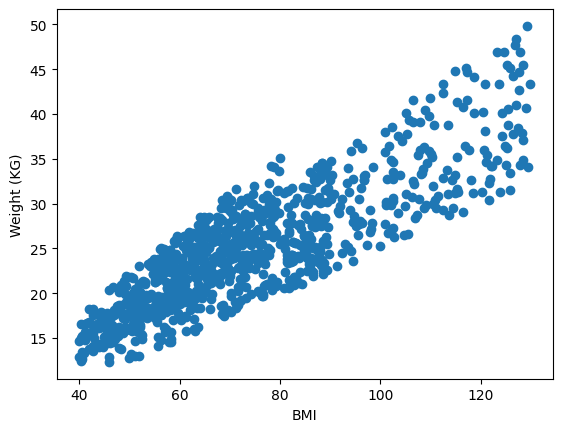

In [9]:
# bmi relation with weight

plt.scatter(x = data['Weight (kg)'], y = data['BMI'])
plt.xlabel('BMI')
plt.ylabel('Weight (KG)')
plt.show()

In [10]:
# plt.figure(figsize=(8,6))
# sns.boxplot(data=data,x=data['Workout_Type'],y=data['Fat_Percentage'],hue=data['Workout_Type'])
# plt.show()

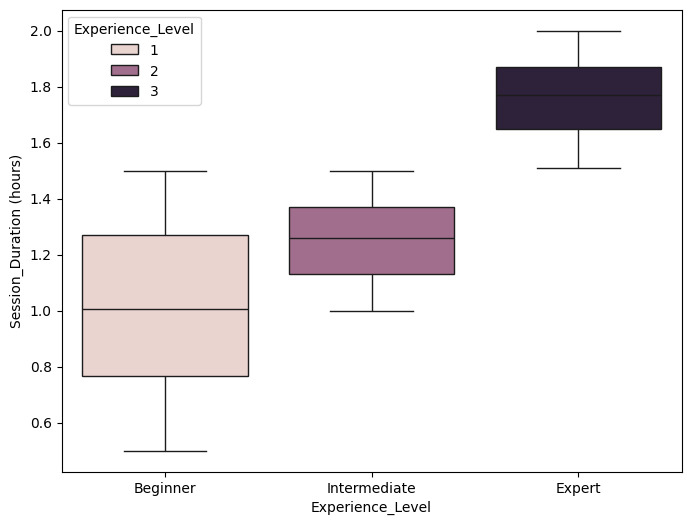

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x=data['Experience_Level'],y=data['Session_Duration (hours)'],hue=data['Experience_Level'])
labels = ['Beginner', 'Intermediate', 'Expert']
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)
plt.show()

In [12]:

data['Workout_Type'] = label.fit_transform(data['Workout_Type'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    int32  
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    int32  
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

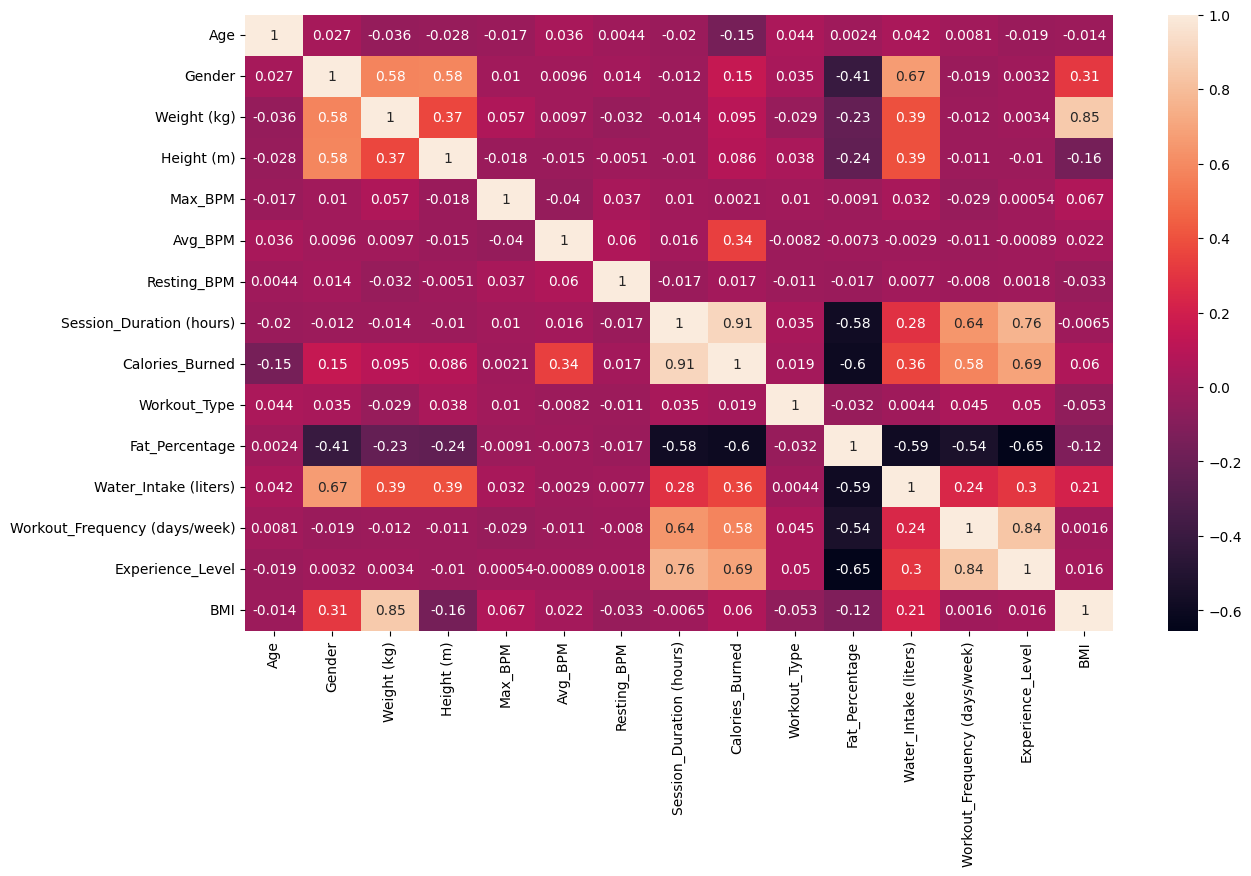

In [15]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [18]:
data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [20]:
x = data.drop(columns=['Calories_Burned'])
y = data['Calories_Burned']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
#model binding 

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 30.22
mean_squared_error : 1639.91
r2_score : 0.98


In [30]:
gr = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth= 6,min_samples_leaf=10,min_samples_split=8)
gr.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 30.22
mean_squared_error : 1639.91
r2_score : 0.98


In [32]:
# Saving the model, scaler, and encoder to disk
import pickle

# Save the GradientBoosting model
pickle.dump(gr, open('gr.pkl', 'wb'))